# -----------------------------------Food Demand Prediction----------------------------------------

## Step 1: Understanding the Data

### Train.csv
id:	Unique ID                                                                                                                                   
week:	Week No                                                                                                                                   
center_id:	Unique ID for fulfillment center                                                                                                                                                                                                                                                                      
meal_id: Unique ID for Meal                                                                                                                                   
checkout_price:	Final price including discount, taxes & delivery charges                                                                                                                                   
base_price:	Base price of the meal                                                                                                                                                                                                                                                                      
emailer_for_promotion:	Emailer sent for promotion of meal                                                                                                                                   
homepage_featured:	Meal featured at homepage                                                                                                                                   
num_orders:	Orders Count

### Fullfillment_center_info.csv

center_id:	Unique ID for fulfillment center (Common in Train.csv)                                                                                             
city_code:	Unique code for city                                                                                                                                                                                  
region_code:  Unique code for region                                                                                                                                                                                                                                                                           
center_type:  Anonymized center type                                                                                                                                                                                  
op_area:  Area of operation (in km^2)

### Meal.csv
meal_id:	Unique ID for the meal (Common in Train.csv)                                                                                                                                                                                        
category:	Type of meal (beverages/snacks/soups….)                                                                                            
cuisine:	Meal cuisine (Indian/Italian/…)

## What is the target Column?

Since the problem statement is to find the demand of the Food supply , num_orders which gives the information orders count will be the target variable because if a particular food item x was order n number of times and food item y ordered 2x number of times we can tell item y has more demand and we nee to predict that demand                                                                  

In addition to the above point the num_order column was not given in test.csv file.😝                                                      
Question) There are some other columns as well that aren't given in test.csv file what about those?
Answer) Probably we can use them for feature engineering purpose(For creating more features)

## What is the Use Case?

The replenishment of raw materials is done only on weekly basis and since the raw material is perishable, the procurement planning is of utmost importance.  


Predicting the Demand helps in reducing the wastage of raw materials which would result in the reduced cost of operation. Increased customer satisfaction by timely fulfilling their expectations and requirements.

## Step 2: Importing the required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Step 3: Importing the Data

In [3]:
df = pd.read_csv("train.csv")
meal_info = pd.read_csv("meal_info.csv")
fulfilment_center_info = pd.read_csv("fulfilment_center_info.csv")

## Step 4: Data Frame visulaization

In [4]:
df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40
...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729


In [5]:
df.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

In [6]:
meal_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [7]:
meal_info.shape

(51, 3)

In [8]:
meal_info.isnull().sum()

meal_id     0
category    0
cuisine     0
dtype: int64

In [9]:
fulfilment_center_info.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [10]:
fulfilment_center_info.shape

(77, 5)

In [11]:
fulfilment_center_info.isnull().sum()

center_id      0
city_code      0
region_code    0
center_type    0
op_area        0
dtype: int64

#### Understanding:

There are no null values in any of the data.                                                                                                
Shape of train.csv is 456548 rows × 9 columns                                                                                             
Shape of meal_info.csv is 51 rows x 3 columns                                                                                             
Shape of fulfilment_center_info.csv is 77 rows x 5 columns 

## Step 4: Merging the data based on common features/columns/variables

In [12]:
df = df.merge(meal_info,on='meal_id', how = 'left')

In [13]:
df = df.merge(fulfilment_center_info, on='center_id', how = 'left')

In [14]:
df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,647,56,TYPE_C,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,Desert,Indian,473,77,TYPE_A,4.5
456544,1062036,145,61,2304,482.09,482.09,0,0,42,Desert,Indian,473,77,TYPE_A,4.5
456545,1110849,145,61,2664,237.68,321.07,0,0,501,Salad,Italian,473,77,TYPE_A,4.5
456546,1147725,145,61,2569,243.50,313.34,0,0,729,Salad,Italian,473,77,TYPE_A,4.5


In [15]:
df.shape

(456548, 15)

# ########################Data Preprocessing#######################

### ------------------------------------------------------------- Checking for null values------------------------------------------------------------

In [16]:
df.isnull().sum() #checking for null values

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
category                 0
cuisine                  0
city_code                0
region_code              0
center_type              0
op_area                  0
dtype: int64

In [17]:
df.shape

(456548, 15)

### 2) --------------------------------------------------Checking the data types of the variables----------------------------------------------

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   category               456548 non-null  object 
 10  cuisine                456548 non-null  object 
 11  city_code              456548 non-null  int64  
 12  region_code            456548 non-null  int64  
 13  center_type            456548 non-null  object 
 14  op_area                456548 non-nu

### ------------------------------------------------------Checking the Categorical Values--------------------------------------------------------

In [19]:
'''
Prints the columns names which are of integer, float data types.
'''
numerical_cols = list(df.select_dtypes(exclude='object').columns)
numerical_cols

['id',
 'week',
 'center_id',
 'meal_id',
 'checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured',
 'num_orders',
 'city_code',
 'region_code',
 'op_area']

In [20]:
'''
Prints the column names which are of categorical data types.
'''
categorical_cols = list(df.select_dtypes(exclude=[np.number]).columns)
categorical_cols

['category', 'cuisine', 'center_type']

# ############################EDA#################################

### --------------------------------------------------Checking the correlation of the columns---------------------------------------------------

corr() function give the information of correlatiin between the numerical columns. From this we can drop the highly correlated columns because, having multiple columns gives the same information doesn't make sense and output might skew towards it.                  
-1 Correlation : Two features are inversly proportinal                                                                                   
0 Correlation : There is no correlation between the features                                                                                 
1 Correlation : Features are highly correlated

In [21]:
df.corr()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
id,1.000000,0.002225,0.002641,0.000488,0.001941,0.002909,0.002001,0.003111,0.000702,-0.000387,-0.000648,-0.000090
week,0.002225,1.000000,-0.003450,0.019814,0.026581,0.028614,-0.000841,-0.008263,-0.017210,0.000405,0.004600,0.001550
center_id,0.002641,-0.003450,1.000000,0.009893,0.001348,0.000604,0.013658,-0.005043,-0.053035,0.061078,-0.003426,-0.111869
meal_id,0.000488,0.019814,0.009893,1.000000,0.010748,0.002605,0.013402,0.016354,0.010597,-0.003198,-0.001662,-0.001546
checkout_price,0.001941,0.026581,0.001348,0.010748,1.000000,0.953389,0.004818,-0.057184,-0.282108,-0.004805,-0.003648,0.021569
base_price,0.002909,0.028614,0.000604,0.002605,0.953389,1.000000,0.171173,0.057156,-0.222306,-0.002054,-0.001934,0.018031
emailer_for_promotion,0.002001,-0.000841,0.013658,0.013402,0.004818,0.171173,1.000000,0.390534,0.277147,-0.005234,-0.007462,-0.019462
homepage_featured,0.003111,-0.008263,-0.005043,0.016354,-0.057184,0.057156,0.390534,1.000000,0.294490,0.008640,0.003605,0.041498
num_orders,0.000702,-0.017210,-0.053035,0.010597,-0.282108,-0.222306,0.277147,0.294490,1.000000,0.041596,0.029744,0.176976
city_code,-0.000387,0.000405,0.061078,-0.003198,-0.004805,-0.002054,-0.005234,0.008640,0.041596,1.000000,0.042686,0.131476


<AxesSubplot:>

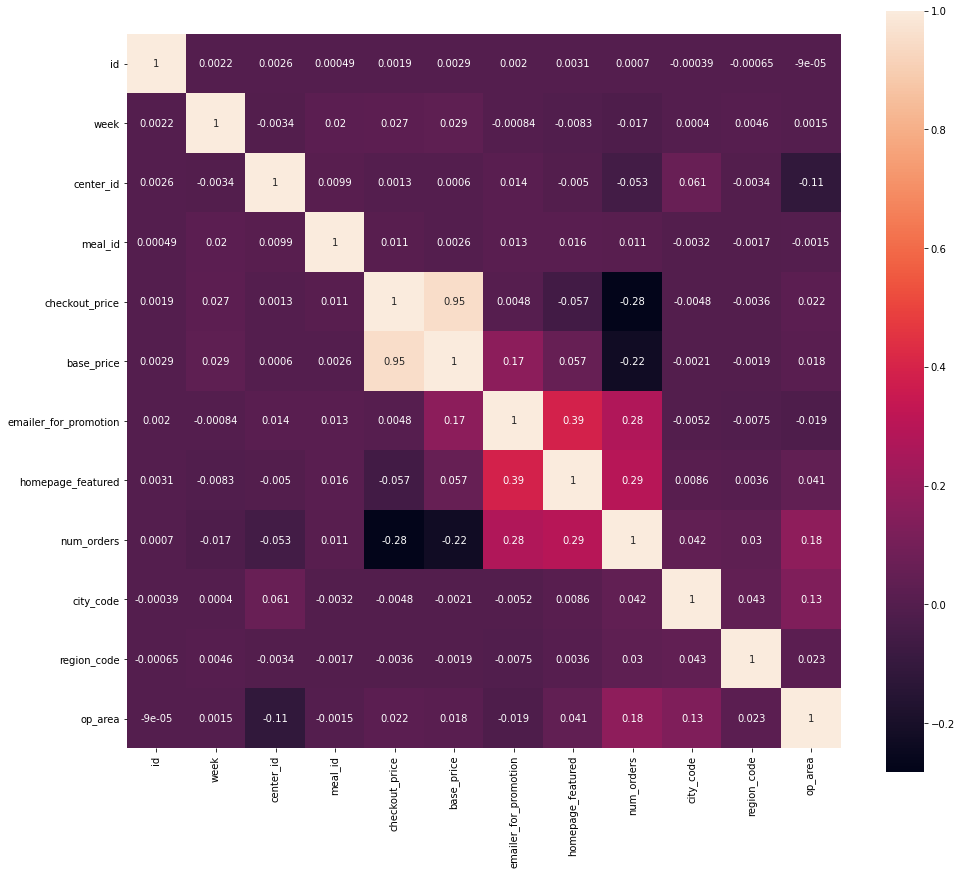

In [22]:
#sns.heatmap(df.corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2)
plt.figure(figsize=(16,14))
sns.heatmap(df.corr(),annot=True, square=True)

### ------------------------------------------------------------- describing the dataframe------------------------------------------------------------

describe() will give the 5 statistical values of the data:                                                                                 
1) minimumvalue of the column                                                                                                                                                            
2) maximum value of the column                                                                                                                                                            
3) 25th percentile of the column                                                                                                                                                            
4) 50th percentile of the column                                                                                                                                                            
4) 75th percentile of the column                                                                                                                                                            
5) mean of the column                                                                                                                                                            
6) standard deviation of the column                                                                                                                                                            
7) no.of rows of each columns                                                                                                                                                            

In [23]:
df.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000


## ========================Univariate Analysis============================

### ------------------------------------------------Checking the distribution of Traget Variable------------------------------------------------

Usually, We prefer the the normal distribution. So if the distribution was not normal we will change the data into log normal distribution.

In [24]:
df['num_orders'].value_counts()

13      12397
15      12294
14      12270
28      11548
27      11462
        ...  
4819        1
7262        1
6750        1
7007        1
5629        1
Name: num_orders, Length: 1250, dtype: int64

<AxesSubplot:xlabel='num_orders', ylabel='count'>

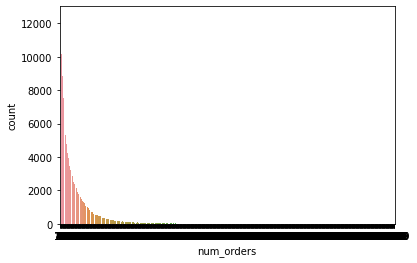

In [25]:
sns.countplot(df['num_orders'])

In [26]:
'''
converting the data into log normal distribution.
'''
def Transform(x):
    return np.log(x)

df['num_orders'] = df['num_orders'].apply(Transform)

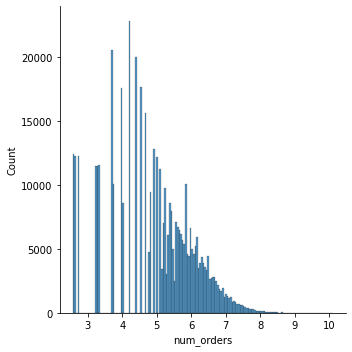

In [27]:
sns.displot(df['num_orders'])

### ------------------------------------------------------ Count plots of the Categorical Variables------------------------------------------------

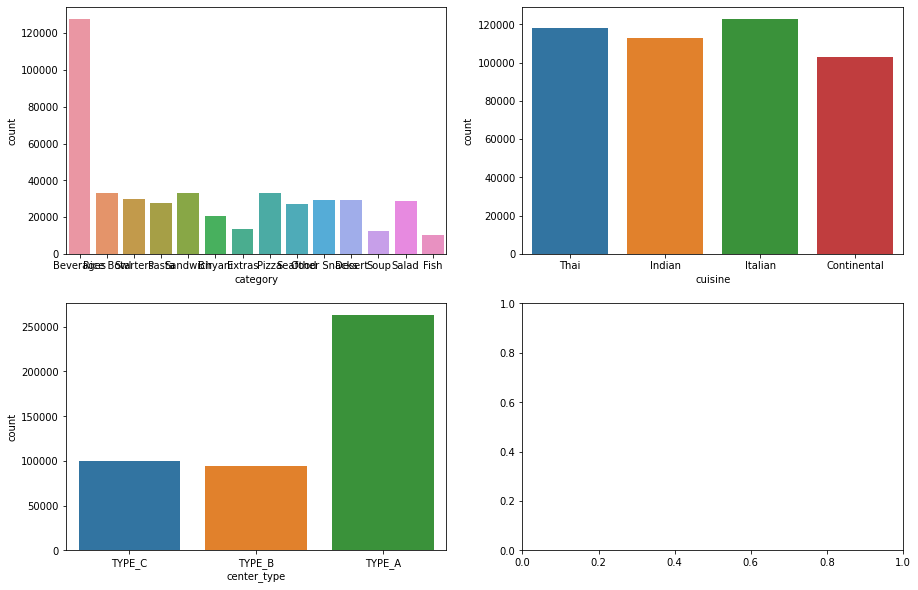

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
for ax, col in list(zip(axes.flat, categorical_cols)):   
    if col != numerical_cols:    
        sns.countplot(col, data=df, ax=ax)

### -------------------------------------------------------Box plots of the Numerical Variables--------------------------------------------------------

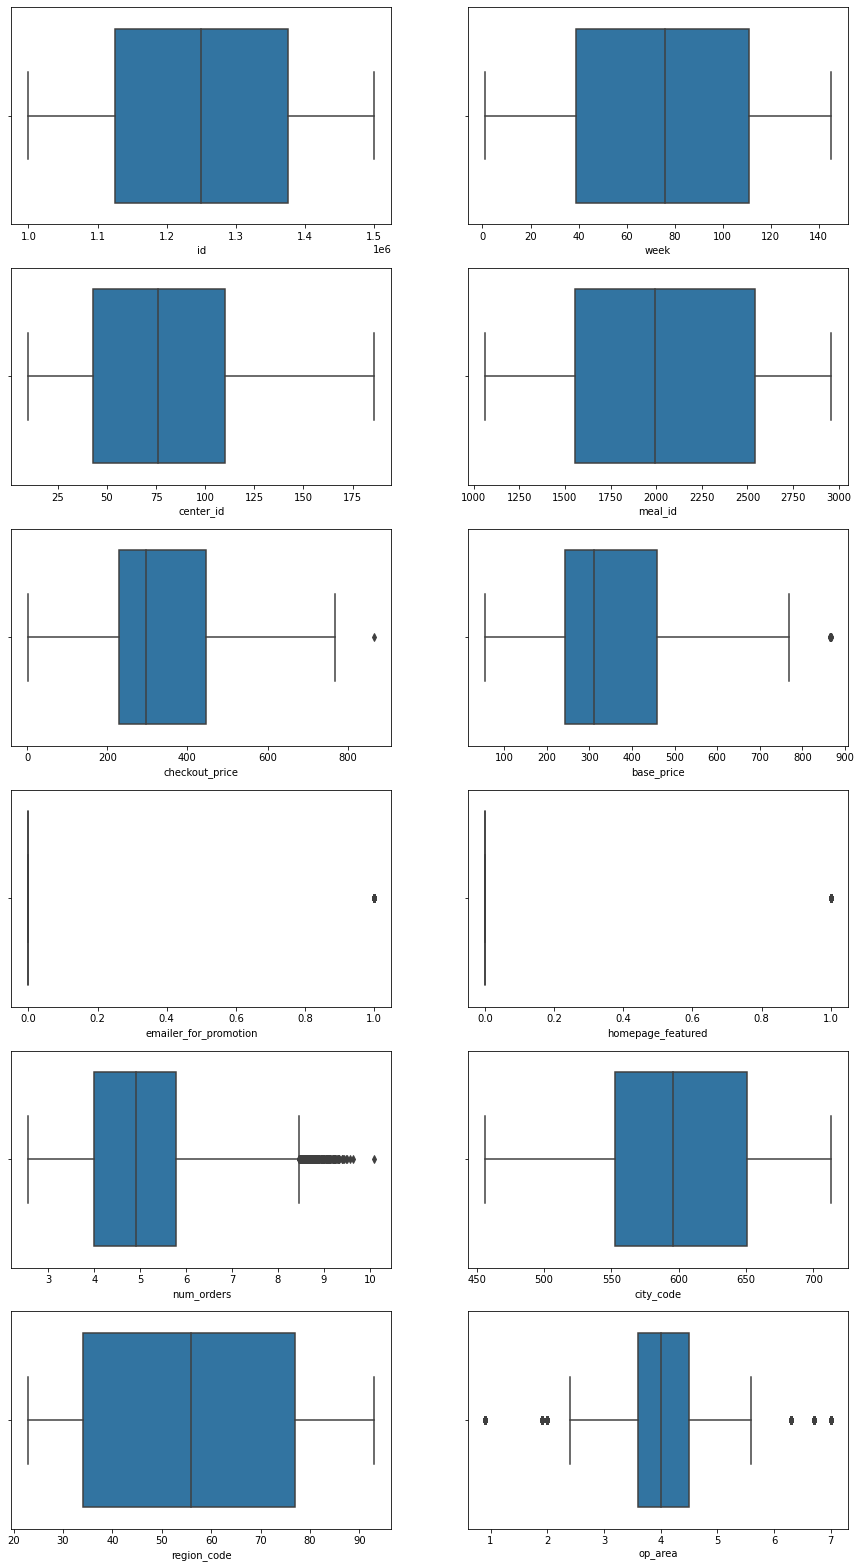

In [29]:
'''
Boxplots gives the information of minimum, maximum, median, 25th percentile, 75th percentile, outlier.

1) Upper wiscer: Maximum value
2) Lower wiscer: Minimum value
3) Middle Line: Median
4) Box starting: 25th percentile 
5) Box Ending: 75th percentile
6) Outliers: Dots outside the wiscers
'''

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(15, 28))

for ax, col in list(zip(axes.flat, numerical_cols)):   
    if col != categorical_cols:    
        sns.boxplot(col, data=df, ax=ax)

<AxesSubplot:xlabel='cuisine', ylabel='count'>

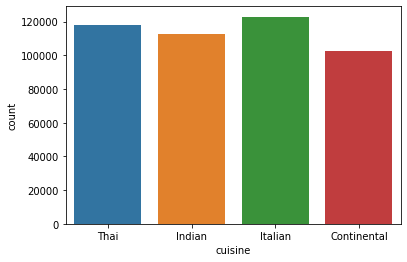

In [30]:
'''
OBSERVATION: 

- Count plot of the cuisines tell that most popular cuisine.
- From the cuisine count plot we can see that Italian cuisine was more popular followed with Thai and Indian cuisines.
- Usually, Hotel people while ordering raw materials for preparing the food they need to analyse the sale of the cuisines, 
 which helps in satisfying the customers according to their needs and reduce the wastage.
- As per the count plot, Italian cuisines are most popular most number of people order it, So Management can order raw 
 materials required for Italian cuisines more compared to Continental. 

'''

sns.countplot('cuisine', data=df)

<AxesSubplot:xlabel='category', ylabel='count'>

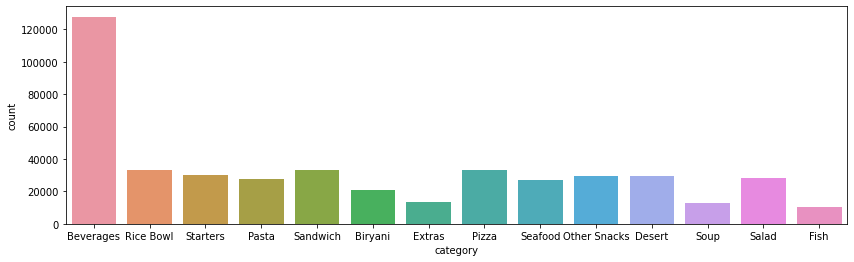

In [31]:
'''
OBSERVATION:

-According to the above count plot, beverages were sold more compared to the any other category.
-Hotel people can maintain more stock of beverages, So that hotel management may not disappoint the customers.

'''

plt.figure(figsize=(14,4))
sns.countplot('category', data=df)

## 4)------------------------------------------------Bivariate Analysis------------------------------------------------------

<AxesSubplot:xlabel='center_type', ylabel='num_orders'>

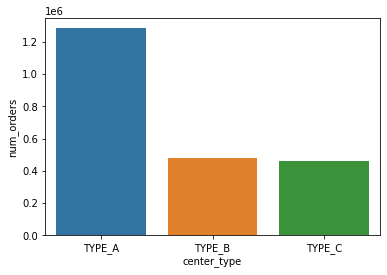

In [32]:
'''
OBSERVATION: 

- This gives the information of number of orders that each type of center get.
- The plot shows the center_type of Type_A gets the more number of orders.
- So, Hotels belong to Type_A should have stock of more raw materials compared to the remaining types 
- Type_B and Type_C are getting almost same amount of orders.

'''

sns.barplot(y='num_orders', x='center_type', data=df.groupby('center_type').sum()['num_orders'].reset_index())

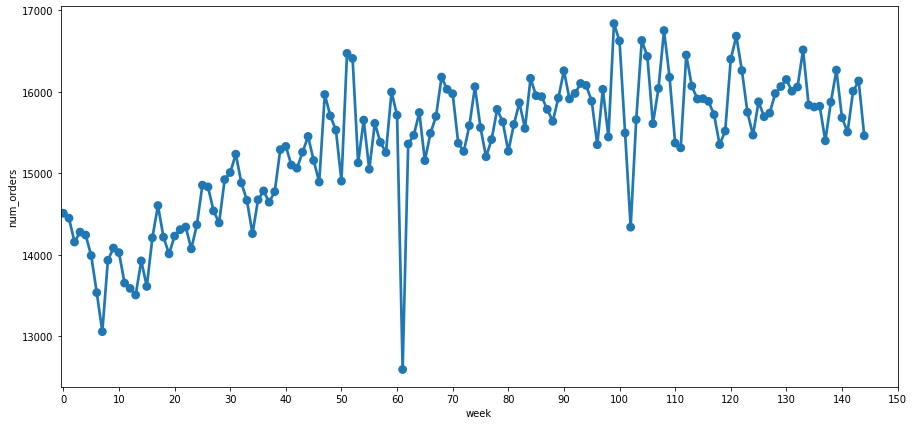

'\nEven without plt.show(), we can plot the graph but plt.show() will supress the exrta lines printed other than the graph.\nExmaple in num_orders vs category graphy we can see "<AxesSubplot:xlabel=\'category\', ylabel=\'num_orders\'>". This kind \nof lines will be suppressed \n'

In [33]:
'''
OBSERVATION: 

- Above plot shows the week wise num_orders.
- We can see that sales in the week 62 went too low and in the week 98 and 109 went peak.

'''

plt.figure(figsize=(15,7))
sns.pointplot(x=df.groupby('week').sum().reset_index()['week'],y=df.groupby('week').sum().reset_index()['num_orders'])
plt.xticks(range(0, 160, 10), list(np.arange(0,160,10)))
plt.show()

'''
Even without plt.show(), we can plot the graph but plt.show() will supress the exrta lines printed other than the graph.
Exmaple in num_orders vs category graphy we can see "<AxesSubplot:xlabel='category', ylabel='num_orders'>". This kind 
of lines will be suppressed 
'''

In [34]:
df[df.week == 62].emailer_for_promotion.value_counts()

0    2715
1     175
Name: emailer_for_promotion, dtype: int64

<AxesSubplot:>

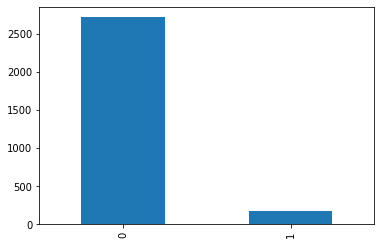

In [35]:
df[df.week == 62].emailer_for_promotion.value_counts().plot(kind='bar')

In [36]:
df[df.week == 98].emailer_for_promotion.value_counts()

0    2899
1     383
Name: emailer_for_promotion, dtype: int64

<AxesSubplot:>

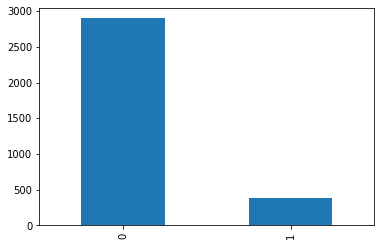

In [37]:
df[df.week == 98].emailer_for_promotion.value_counts().plot(kind='bar')

In [38]:
df[df.week == 109].emailer_for_promotion.value_counts()

0    2779
1     520
Name: emailer_for_promotion, dtype: int64

<AxesSubplot:>

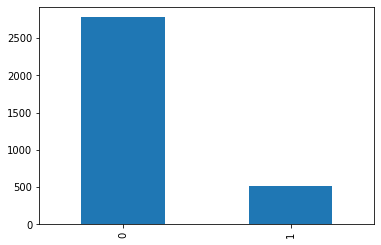

In [39]:
df[df.week == 109].emailer_for_promotion.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='category', ylabel='num_orders'>

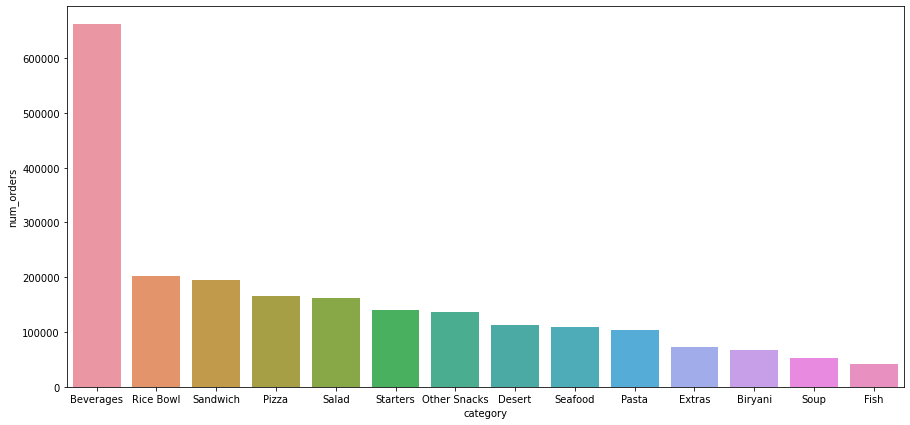

In [40]:
'''
OBSERVATION:

- Beverages are more cnserved compared to the any other category
- Hotel management need to maintain a Good Amount of stock of Beverages.
'''

plt.figure(figsize=(15,7))
sns.barplot(y='num_orders', x='category', data=df.groupby('category').num_orders.sum().sort_values(ascending=False).reset_index())

<AxesSubplot:xlabel='week', ylabel='emailer_for_promotion'>

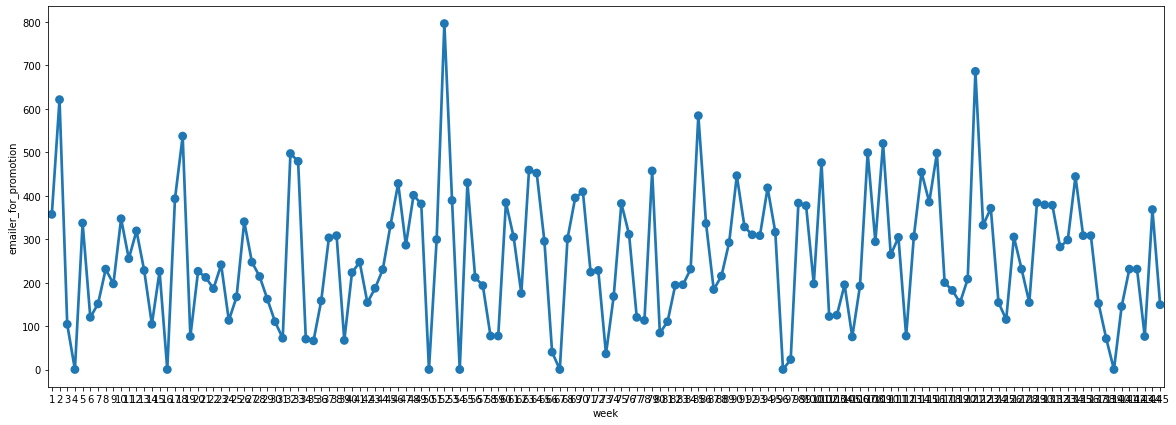

In [41]:
plt.figure(figsize=(20,7))
sns.pointplot(y='emailer_for_promotion', x='week', data=df.groupby('week').emailer_for_promotion.sum().sort_values(ascending=False).reset_index())

<AxesSubplot:xlabel='base_price', ylabel='checkout_price'>

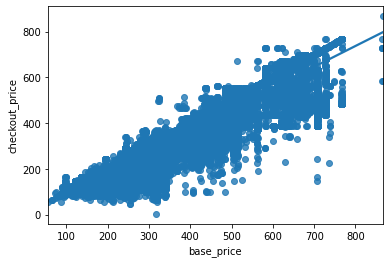

In [42]:
'''
OBSERVATION:

- According to the graph as the base price of the meal increases the checkout price of the meal also increases 
- There are few meals with the base price of 700 and checkout_price of below 250. Probably because of low popularity of the 
  food type.
- There are 1-2 meals of which base_price and checkout_price were same, probably because of high demand. During the low 
  num_orders. Hotel Management can have offer on this kind of meals. So that there is a chance of ordering the item.

'''

sns.regplot(x="base_price", y="checkout_price", data=df)

<AxesSubplot:xlabel='checkout_price', ylabel='num_orders'>

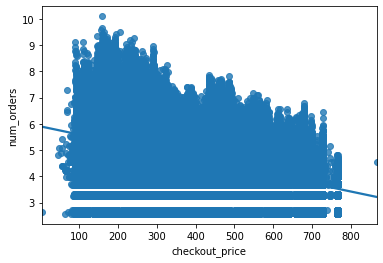

In [43]:
'''
OBSERVATIONS:

- According the plot as check_out price increases num_orders slightly decreased.
- The meals with checkout_price of around 150 were sold a lot compared to any other. 
- Hotel management should maintain the stock accordingly and management can add new dishes that costs similar amount.
'''

sns.regplot(x="checkout_price", y="num_orders", data=df)

<AxesSubplot:xlabel='base_price', ylabel='num_orders'>

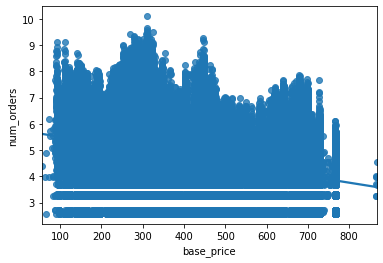

In [44]:
'''
OBSERVATIONS:

- According to the graph we can see food which costs around 300 were sold more.If we map the graph with previous graph 
  checkout_price at 150 and base_price of 300 has the highest and similar kind of plot.
- So there is a probability that people are interested in buying the food with 50% discount and more. 

'''

sns.regplot(x="base_price", y="num_orders", data=df)

<AxesSubplot:xlabel='region_code', ylabel='num_orders'>

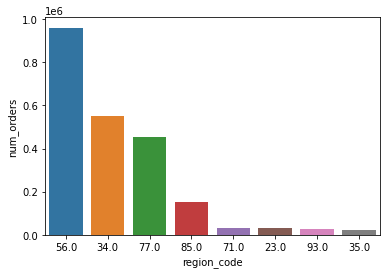

In [45]:
'''
OBSERVATION:

- The plot give the information of number of orders according to the region.
- We can see that the region 56 has more number of orders.

'''

sns.barplot(y='num_orders',x='region_code',data=df.groupby('region_code').num_orders.sum().sort_values(ascending=False).reset_index(),order=list(df.groupby('region_code').num_orders.sum().sort_values(ascending=False).reset_index().values[:,0]))

## 5)------------------------------------------------Multivariate Analysis----------------------------------------------------

<AxesSubplot:xlabel='center_id', ylabel='num_orders'>

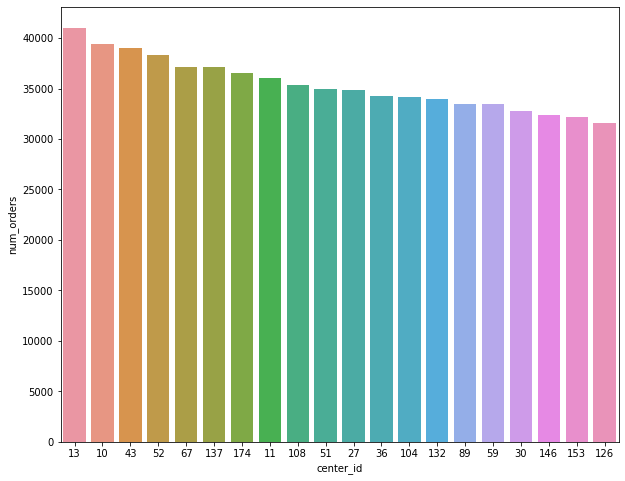

In [46]:
'''
OBSERVATIONS:

- The plot gives the information of the total number of orders received by the top 20 center_id’s.
- Hotel Management can maintain a good amount of stock in these center_id ‘s and management also can apply the strategies 
  that are applying at center_id 13 at different centers as it got the hughes number of orders.
- Reason for top 20 is, since there are many center id’s, printing all center_id was messing up and unable to see the 
  center_id properly and also can get an idea of other centers by seeing the trend of top 20 centers. 
'''

fig=plt.figure(figsize=(10,8))
sns.barplot(y='num_orders', x='center_id', data=df.groupby(['center_id','center_type']).num_orders.sum().sort_values(ascending=False).reset_index().head(20),order=list(df.groupby(['center_id','center_type']).num_orders.sum().sort_values(ascending=False).reset_index().head(20)['center_id']))

<AxesSubplot:xlabel='category', ylabel='num_orders'>

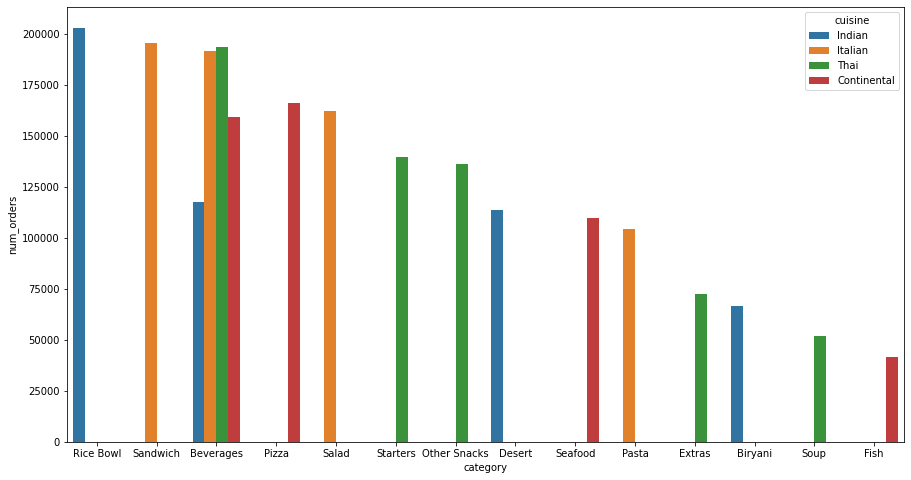

In [47]:
'''
OBSERVATIONS:

- The plot gives us a lot of information that Indian Rice bowl has the hughes number of orders followed by Italian Sandwich.
- In beverages, Thai beverages are more popular followed by Italian beverages compared to the Indian beverages.  
- The graph gives the information of special category of each country.
 
'''

fig=plt.figure(figsize=(15,8))
sns.barplot(x='category',y='num_orders',data=df.groupby(['cuisine','category']).sum().
           sort_values(by='num_orders',ascending=False).reset_index(),hue='cuisine')

## 6)-----------------------------------------------------------Auto EDA---------------------------------------------------------

In [48]:
df.to_csv("output.csv")

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.
Shape of your Data Set: (456548, 16)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  5
    Number of String-Categorical Columns =  3
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  2
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  

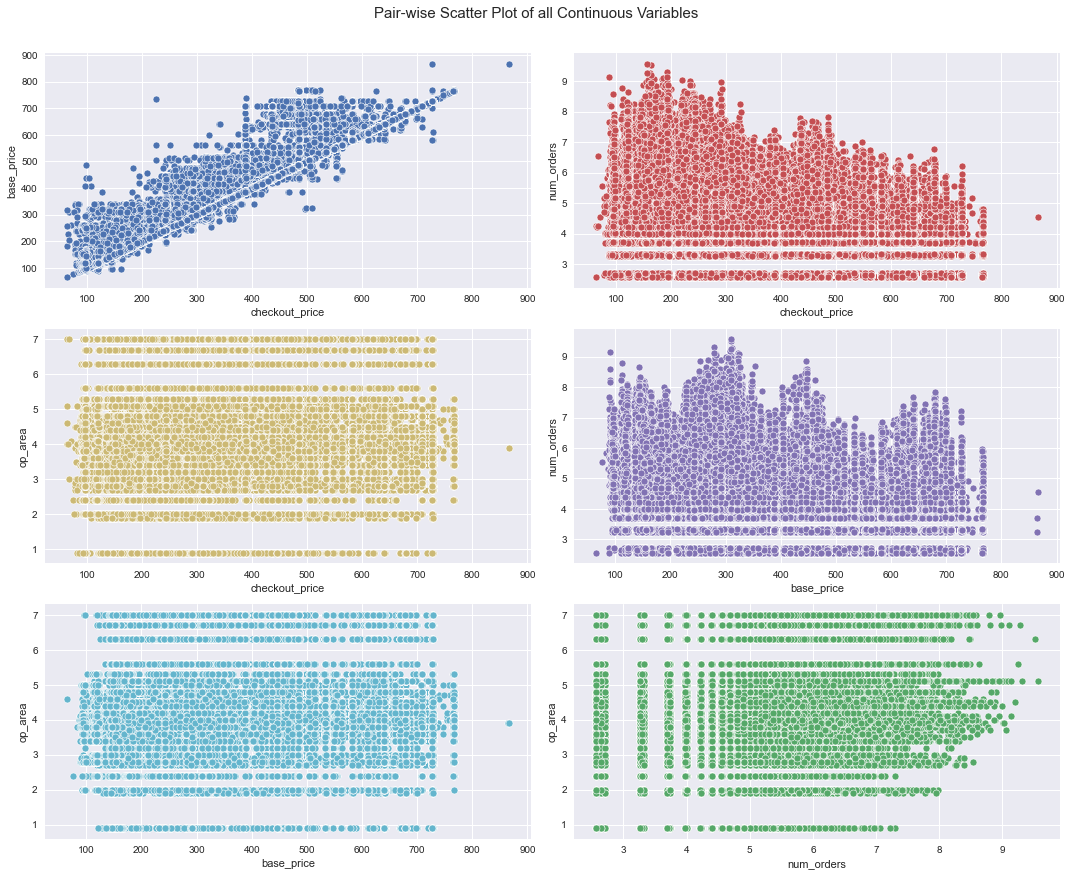

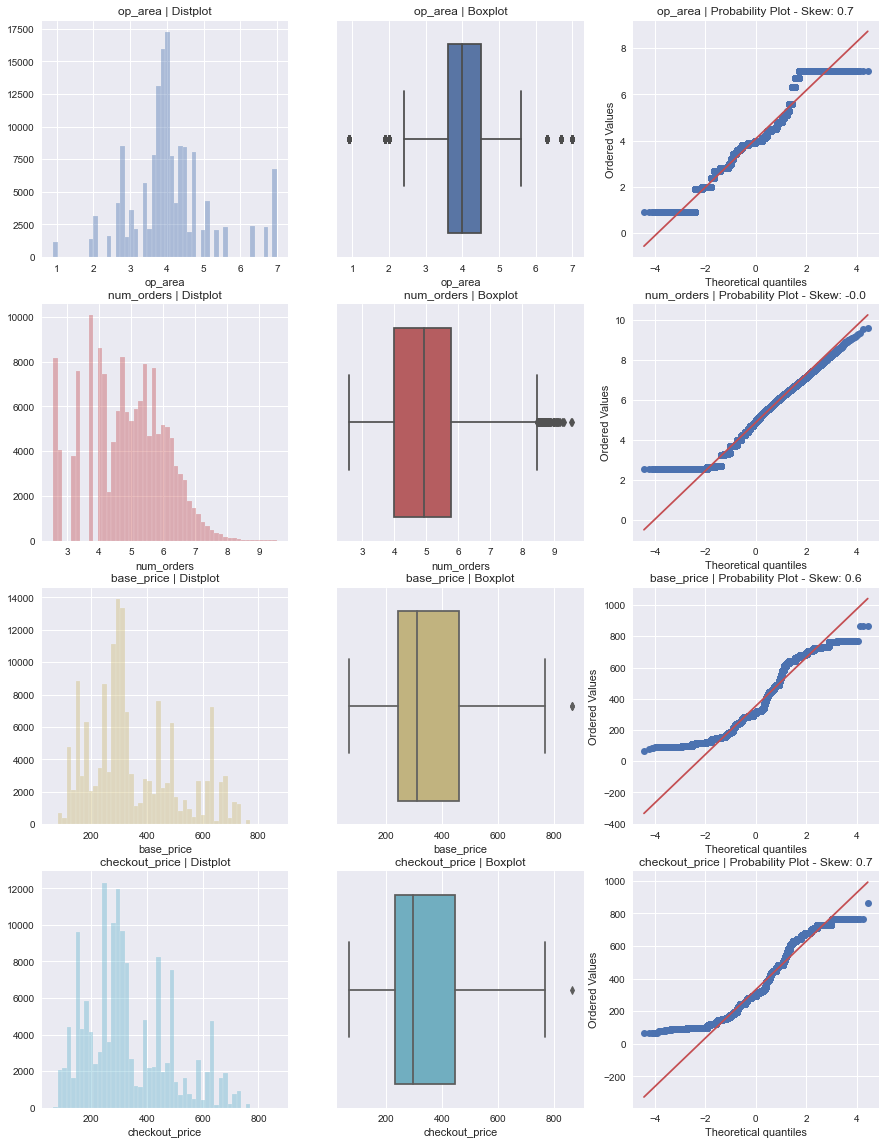

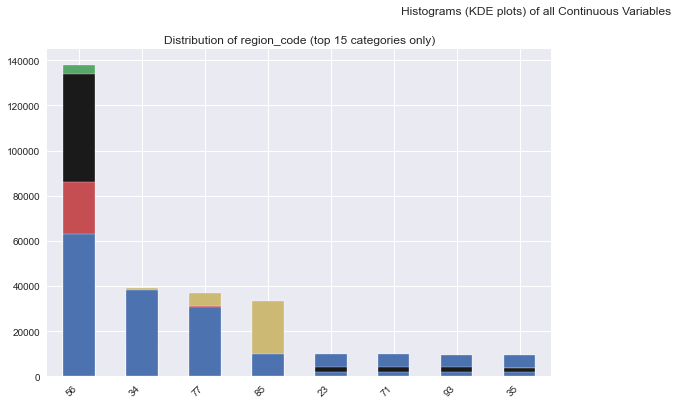

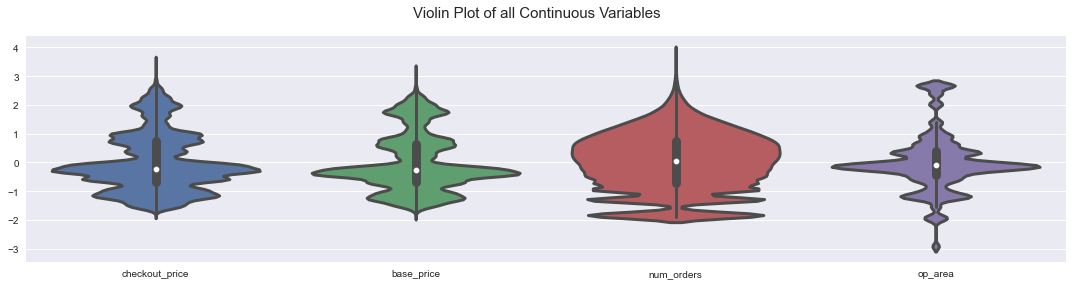

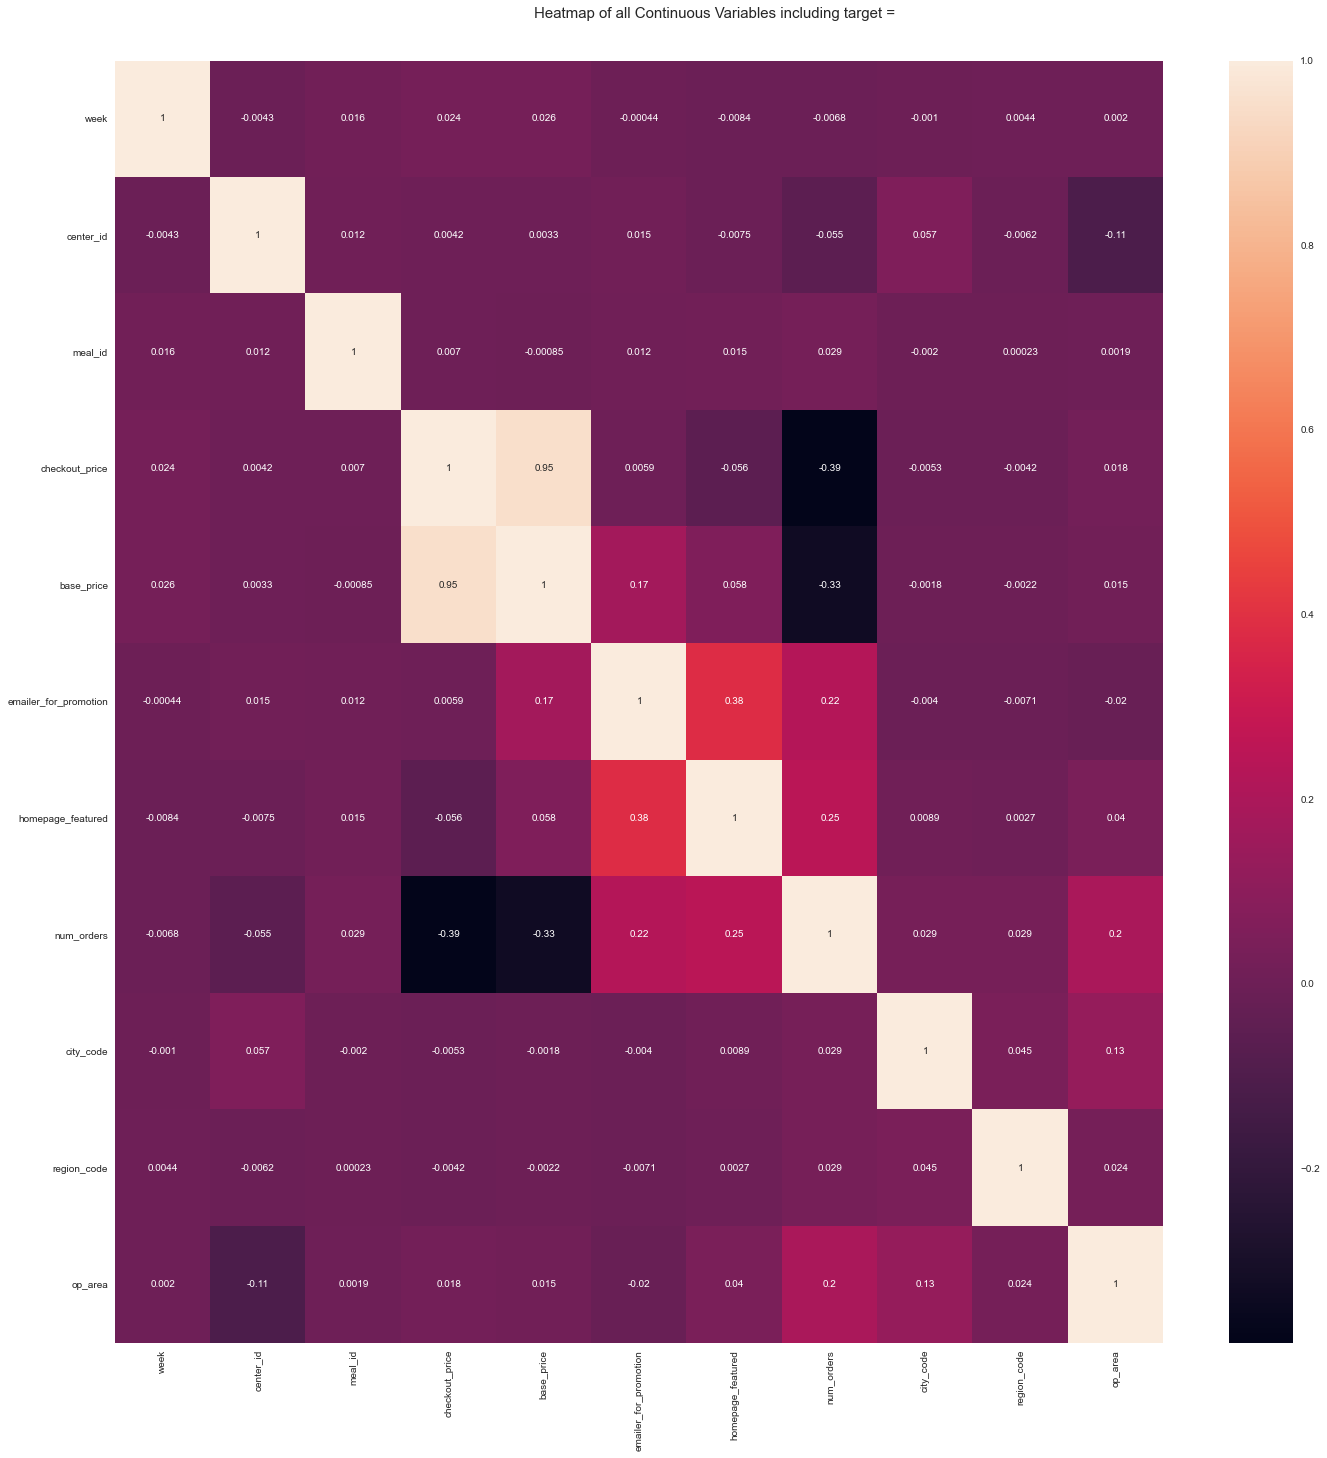

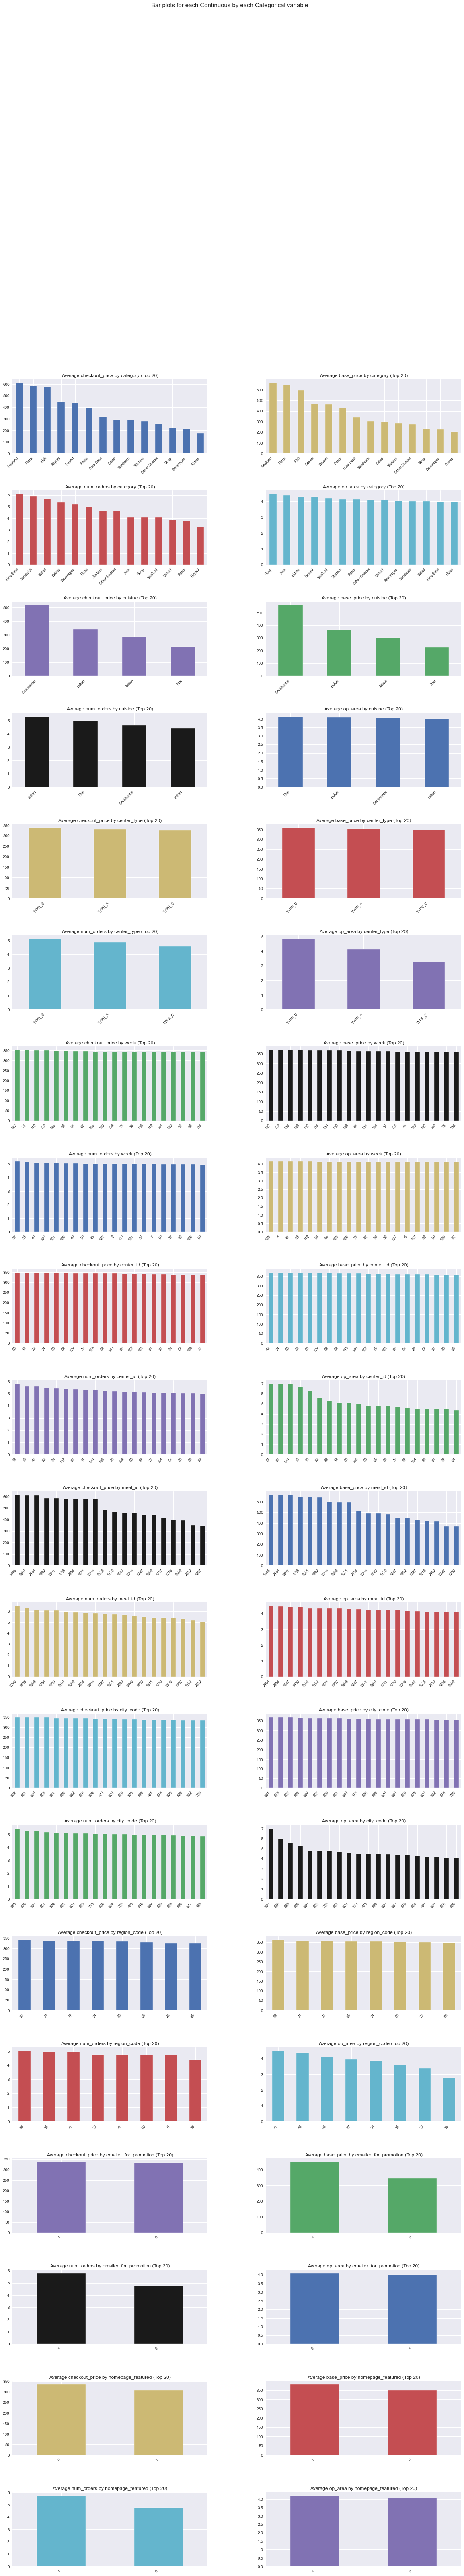

Time to run AutoViz (in seconds) = 61.026

 ###################### VISUALIZATION Completed ########################


In [49]:
from autoviz.AutoViz_Class import AutoViz_Class 
AV = AutoViz_Class()
dataviz = AV.AutoViz('output.csv')

# ######################Feature Engineering########################

In [62]:
df_new = df.copy() # using a deep copy technique for making a copy of the data

From the EDA we can seen that the demand of the product was depend on the discount(from Regression plots), the week they purchase(from pointplots). So we need to consider the discount amount, discount percent and for the idea of the revenue generation we need to consider the Quater and Year features as well.  

### -------------------------------Let's Create Features that we need  which were observed from EDA------------------------------

In [63]:
'''
Firstly, the demand is depended on the discount the customers are getting. 
Discount plays an important role in the demand, which gives the "price to quality" satisfaction for the customer.
We can calculate the discount using base_price and checkout_price columns.

---------------------------------------discount = base_price - checkout_price-----------------------------------------------

If the discount was positive number, it says the discount amount. If the discount was 0 then there is no discount and 
if the disount was negative, it means checkout_price is more than the base_price. This might happen because of food delivery
charges or if price of the graw material increases.
'''

df_new['discount'] = df_new['base_price'] - df_new['checkout_price']

In [64]:
# Since discount pecentage also matters along with the discount amount. we can create that feature as well

df_new['discount_percent'] = ((df_new['base_price'] - df_new['checkout_price'])/df_new['base_price'])*100

In [65]:
df_new

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,discount,discount_percent
0,1379560,1,55,1885,136.83,152.29,0,0,5.176150,Beverages,Thai,647,56,TYPE_C,2.0,15.46,10.151684
1,1466964,1,55,1993,136.83,135.83,0,0,5.598422,Beverages,Thai,647,56,TYPE_C,2.0,-1.00,-0.736214
2,1346989,1,55,2539,134.86,135.86,0,0,5.241747,Beverages,Thai,647,56,TYPE_C,2.0,1.00,0.736052
3,1338232,1,55,2139,339.50,437.53,0,0,3.988984,Beverages,Indian,647,56,TYPE_C,2.0,98.03,22.405321
4,1448490,1,55,2631,243.50,242.50,0,0,3.688879,Beverages,Indian,647,56,TYPE_C,2.0,-1.00,-0.412371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,4.219508,Desert,Indian,473,77,TYPE_A,4.5,0.00,0.000000
456544,1062036,145,61,2304,482.09,482.09,0,0,3.737670,Desert,Indian,473,77,TYPE_A,4.5,0.00,0.000000
456545,1110849,145,61,2664,237.68,321.07,0,0,6.216606,Salad,Italian,473,77,TYPE_A,4.5,83.39,25.972529
456546,1147725,145,61,2569,243.50,313.34,0,0,6.591674,Salad,Italian,473,77,TYPE_A,4.5,69.84,22.288887


In [66]:
'''
Based on the given number of weeks, derived a new feature named as Quarter which defines the Quarter of the year.
Quater feature can help us in understanding the quarterly sales and quaterly revenuse share of the each food item, which can
give a reasonable idea about the demand of the food item.

Quarter Contains 13 weeks.
'''

df_new['Quarter']=(df_new['week']/13).astype('int64')

In [67]:
df_new['Quarter']=df_new['Quarter'].map({0:'Q1',1:'Q2',2:'Q3',3:'Q4',4:'Q1',5:'Q2',6:'Q3',7:'Q4',8:'Q1',9:'Q2',10:'Q3',11:'Q4'})

In [68]:
df_new['Quarter'].value_counts()

Q3    124225
Q2    122386
Q1    117671
Q4     92266
Name: Quarter, dtype: int64

In [69]:
'''
Based on the given number of weeks, derived a new feature named as Year which defines the Year.
Similar to the quarter, Year feature can give the year sale and reveue of the food item.
An Year contains 52 weeks.
'''

df_new['Year']=(df_new['week']/52).astype('int64')

In [70]:
df_new['Year'] = df_new['Year'].map({0:'Y1', 1:'Y2', 2:'Y3'})

In [71]:
df_new['Year'].value_counts()

Y2    166994
Y1    151796
Y3    137758
Name: Year, dtype: int64

<AxesSubplot:>

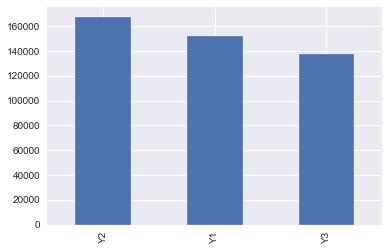

In [72]:
df_new['Year'].value_counts().plot(kind='bar')

In [73]:
df_new

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,discount,discount_percent,Quarter,Year
0,1379560,1,55,1885,136.83,152.29,0,0,5.176150,Beverages,Thai,647,56,TYPE_C,2.0,15.46,10.151684,Q1,Y1
1,1466964,1,55,1993,136.83,135.83,0,0,5.598422,Beverages,Thai,647,56,TYPE_C,2.0,-1.00,-0.736214,Q1,Y1
2,1346989,1,55,2539,134.86,135.86,0,0,5.241747,Beverages,Thai,647,56,TYPE_C,2.0,1.00,0.736052,Q1,Y1
3,1338232,1,55,2139,339.50,437.53,0,0,3.988984,Beverages,Indian,647,56,TYPE_C,2.0,98.03,22.405321,Q1,Y1
4,1448490,1,55,2631,243.50,242.50,0,0,3.688879,Beverages,Indian,647,56,TYPE_C,2.0,-1.00,-0.412371,Q1,Y1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,4.219508,Desert,Indian,473,77,TYPE_A,4.5,0.00,0.000000,Q4,Y3
456544,1062036,145,61,2304,482.09,482.09,0,0,3.737670,Desert,Indian,473,77,TYPE_A,4.5,0.00,0.000000,Q4,Y3
456545,1110849,145,61,2664,237.68,321.07,0,0,6.216606,Salad,Italian,473,77,TYPE_A,4.5,83.39,25.972529,Q4,Y3
456546,1147725,145,61,2569,243.50,313.34,0,0,6.591674,Salad,Italian,473,77,TYPE_A,4.5,69.84,22.288887,Q4,Y3


### --------------------------------------------------------Encode the categorical features---------------------------------------------------------

We encode the categorical columns into the numerical columns by encoding the features into 0 and 1

In [74]:
data = pd.get_dummies(df_new, columns=["category", "cuisine","center_type",'Quarter', 'Year'], prefix=["category", "cuisine","center_type",'Quarter', 'Year'])

In [75]:
data

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,...,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C,Quarter_Q1,Quarter_Q2,Quarter_Q3,Quarter_Q4,Year_Y1,Year_Y2,Year_Y3
0,1379560,1,55,1885,136.83,152.29,0,0,5.176150,647,...,0,0,1,1,0,0,0,1,0,0
1,1466964,1,55,1993,136.83,135.83,0,0,5.598422,647,...,0,0,1,1,0,0,0,1,0,0
2,1346989,1,55,2539,134.86,135.86,0,0,5.241747,647,...,0,0,1,1,0,0,0,1,0,0
3,1338232,1,55,2139,339.50,437.53,0,0,3.988984,647,...,0,0,1,1,0,0,0,1,0,0
4,1448490,1,55,2631,243.50,242.50,0,0,3.688879,647,...,0,0,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,4.219508,473,...,1,0,0,0,0,0,1,0,0,1
456544,1062036,145,61,2304,482.09,482.09,0,0,3.737670,473,...,1,0,0,0,0,0,1,0,0,1
456545,1110849,145,61,2664,237.68,321.07,0,0,6.216606,473,...,1,0,0,0,0,0,1,0,0,1
456546,1147725,145,61,2569,243.50,313.34,0,0,6.591674,473,...,1,0,0,0,0,0,1,0,0,1


### ---------------------------------------------------------- Quosi Constant Columns ----------------------------------------------------------------

Quosi constant columns are with almost zero variance, which means the column gives the less amount of information

In [88]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0.1)

In [89]:
'''
minimum variance for the column is set to 0.01

Variance = N = (Σ(x - xmean))/N - 1

x is data
xmean is mean of the feature column
N = sample size

'''
qcons_filter = VarianceThreshold(threshold=0.01)

In [90]:
'''
fit_transform() performs fit and transform on the input data at a single time and converts the data

fit(): performs the calculation on the data and stores it as an object
tranform(): Transforms the the data into the calculations that are caluculated by fit()
'''
data_qcons = qcons_filter.fit_transform(data)

In [91]:
data_qcons

array([[1.379560e+06, 1.000000e+00, 5.500000e+01, ..., 1.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.466964e+06, 1.000000e+00, 5.500000e+01, ..., 1.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.346989e+06, 1.000000e+00, 5.500000e+01, ..., 1.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [1.110849e+06, 1.450000e+02, 6.100000e+01, ..., 0.000000e+00,
        0.000000e+00, 1.000000e+00],
       [1.147725e+06, 1.450000e+02, 6.100000e+01, ..., 0.000000e+00,
        0.000000e+00, 1.000000e+00],
       [1.361984e+06, 1.450000e+02, 6.100000e+01, ..., 0.000000e+00,
        0.000000e+00, 1.000000e+00]])

In [92]:
data_constant = constant_filter.fit_transform(data)

constant_columns = [column for column in data.columns
                    if column not in data.columns[constant_filter.get_support()]]
#Constant columns names:
for column in constant_columns:
    print(column)

emailer_for_promotion
homepage_featured
category_Biryani
category_Desert
category_Extras
category_Fish
category_Other Snacks
category_Pasta
category_Pizza
category_Rice Bowl
category_Salad
category_Sandwich
category_Seafood
category_Soup
category_Starters


In [93]:
print(len(constant_columns))

15


I'm not going to remove the quosi constant columns because, 'emailer_for_promotion' is one of the important feature as per EDA

### ----------------------------------------------Independent and Dependent Variables Split---------------------------------------------------

In [84]:
X = data.drop("num_orders", axis=1)  # X variable has the all the features except num_orders which is target column
y = data['num_orders'] # num_order is the target column so, y is the target variable

In [85]:
X

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,...,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C,Quarter_Q1,Quarter_Q2,Quarter_Q3,Quarter_Q4,Year_Y1,Year_Y2,Year_Y3
0,1379560,1,55,1885,136.83,152.29,0,0,647,56,...,0,0,1,1,0,0,0,1,0,0
1,1466964,1,55,1993,136.83,135.83,0,0,647,56,...,0,0,1,1,0,0,0,1,0,0
2,1346989,1,55,2539,134.86,135.86,0,0,647,56,...,0,0,1,1,0,0,0,1,0,0
3,1338232,1,55,2139,339.50,437.53,0,0,647,56,...,0,0,1,1,0,0,0,1,0,0
4,1448490,1,55,2631,243.50,242.50,0,0,647,56,...,0,0,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,473,77,...,1,0,0,0,0,0,1,0,0,1
456544,1062036,145,61,2304,482.09,482.09,0,0,473,77,...,1,0,0,0,0,0,1,0,0,1
456545,1110849,145,61,2664,237.68,321.07,0,0,473,77,...,1,0,0,0,0,0,1,0,0,1
456546,1147725,145,61,2569,243.50,313.34,0,0,473,77,...,1,0,0,0,0,0,1,0,0,1


In [86]:
y

0         5.176150
1         5.598422
2         5.241747
3         3.988984
4         3.688879
            ...   
456543    4.219508
456544    3.737670
456545    6.216606
456546    6.591674
456547    5.087596
Name: num_orders, Length: 456548, dtype: float64

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

# ########################Feature Selection#########################

### --------------------------------------------------------------------Filter Methods---------------------------------------------------------------------

### 1) Pearson Correlation for Feature Selection-----------------------------------------------------------------------------------------------

<AxesSubplot:>

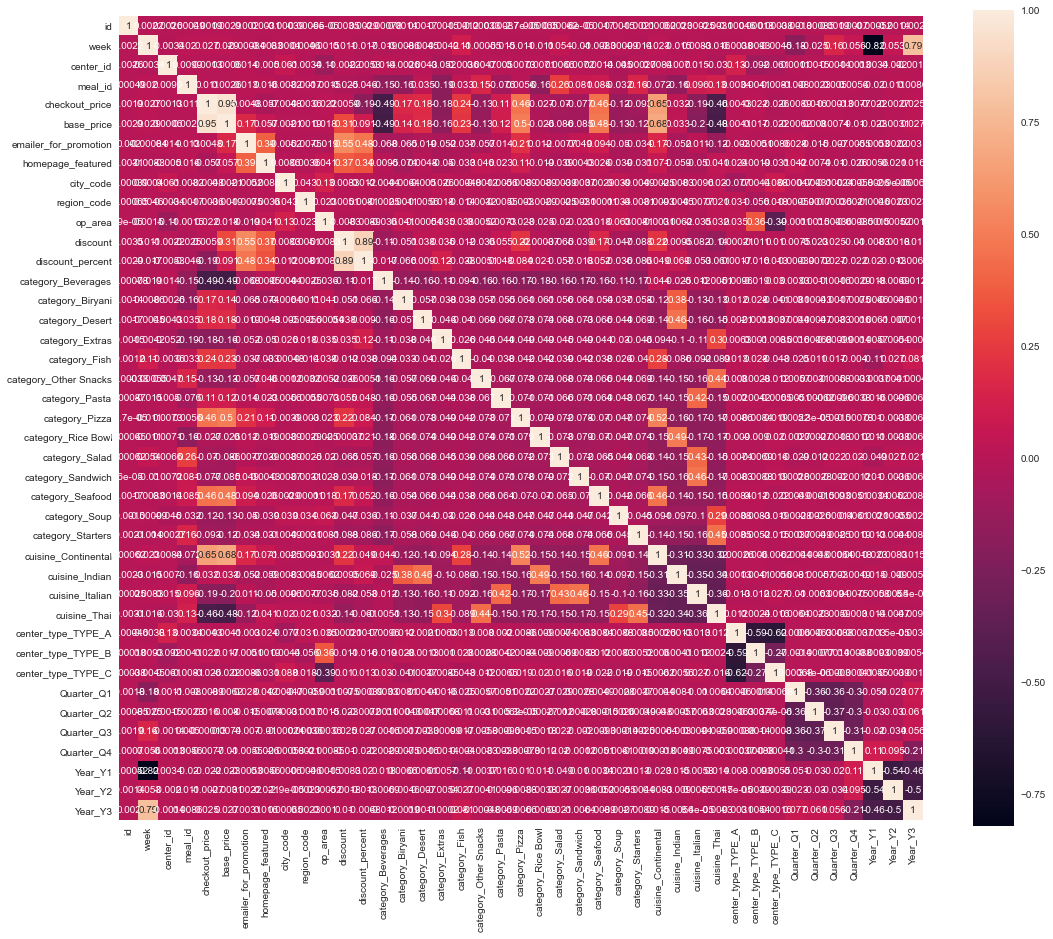

In [87]:
plt.figure(figsize=(18,15))
sns.heatmap(X.corr(),annot=True, square=True)

### 2)Statistical Tests (Anova) for Feature Selection------------------------------------------------------------------------------------------

In [94]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [95]:
best_features = SelectKBest(score_func=f_classif, k='all')
fit = best_features.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

In [96]:
feature_scores = pd.concat([df_columns, df_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score']  
print(feature_scores.nlargest(40,'Score'))  

             Feature_Name      Score
4          checkout_price  66.801590
14       category_Biryani  52.176893
5              base_price  46.618724
7       homepage_featured  41.597960
21     category_Rice Bowl  41.148069
6   emailer_for_promotion  35.321302
28         cuisine_Indian  30.088332
23      category_Sandwich  27.417930
29        cuisine_Italian  26.853615
19         category_Pasta  23.613268
15        category_Desert  20.718232
12       discount_percent  19.628544
10                op_area  18.924047
22         category_Salad  18.558642
27    cuisine_Continental  14.614850
24       category_Seafood  11.415248
11               discount  11.060453
13     category_Beverages  11.032123
33     center_type_TYPE_C   6.441478
20         category_Pizza   5.977682
25          category_Soup   5.855810
32     center_type_TYPE_B   5.728888
30           cuisine_Thai   4.970235
26      category_Starters   4.609988
17          category_Fish   4.270228
16        category_Extras   3.895313
1

### 3) PCA (Principle Component Analysis)------------------------------------------------------------------------------------------------------

In [97]:
from sklearn.decomposition import PCA

In [98]:
pca = PCA(n_components = 18)

In [99]:
principle_components = pca.fit_transform(X)

In [100]:
principledf = pd.DataFrame(data = principle_components)

In [101]:
principledf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-129463.692967,140.596802,-281.507779,-42.895764,3.273478,-29.221032,72.737861,-1.140416,-2.410474,2.349101,0.417865,-0.469503,-0.601231,-0.408523,-0.280167,-0.678447,0.231800,0.037282
1,-216867.693091,32.731451,-294.728809,-42.070955,-17.681750,-29.515363,72.674684,-1.109237,4.876690,2.345549,0.411038,-0.499748,-0.611858,-0.289248,-0.278079,-0.639631,0.260108,0.010310
2,-96892.694103,-513.473509,-297.181905,-42.416396,-13.162118,-29.842454,73.462451,-1.096878,3.632640,2.347131,0.414629,-0.503550,-0.635587,-0.235936,-0.281715,-0.635897,0.368810,0.013169
3,-88135.694880,-114.274153,67.256264,-46.855187,89.614503,-28.889123,75.698363,-1.205615,-0.432416,2.376124,0.493181,-0.463509,-0.293086,0.732595,-0.358694,-0.510665,0.648805,0.014080
4,-198393.694838,-605.770841,-145.908050,-42.233971,-22.680100,-30.093734,74.426719,-1.033957,2.780464,2.381913,0.487874,-0.486612,-0.327313,0.814474,-0.357158,-0.514401,0.864457,-0.005410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,-21229.694230,480.526563,199.656551,130.917761,-32.140500,-11.891141,-70.038653,21.834039,-1.245669,-0.598286,-0.424158,-0.283387,-0.128506,0.934556,0.069831,0.162702,-0.140919,0.978563
456544,188060.304369,-280.845898,195.324133,130.589442,-29.455980,-12.334345,-69.010985,21.851325,-1.544169,-0.596919,-0.420323,-0.294649,-0.162366,1.030269,0.065696,0.175433,0.011411,0.977421
456545,139247.304622,-639.542090,-87.517212,125.928472,89.734113,-11.846534,-68.983673,21.617031,-6.677319,-0.625890,-0.301229,-0.200358,0.965747,-0.013861,-0.011078,0.051729,-0.210538,1.015489
456546,102371.304829,-544.519423,-89.498140,126.657230,72.514132,-11.910428,-69.259974,21.642515,-5.879819,-0.622721,-0.303223,-0.202745,0.967721,-0.019591,-0.009043,0.049463,-0.221298,1.011916


### 4) Chisquare Test for Feature Selection--------------------------------------------------------------------------------------------------------

In [102]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [103]:
data = X.drop(['discount', 'discount_percent'], axis = 1)

In [104]:
stat, p, dof, expected = chi2_contingency(data)
print("p value is " + str(p))

p value is 0.0


### ----------------------------------------------------------------Wrapper Methods-------------------------------------------------------------------

### 1) Forward Feature Selection for Feature Selection--------------------------------------------------------------------------------------

In [105]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS

In [106]:
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [107]:
forward_selection(X,y)

['category_Fish',
 'center_id',
 'category_Desert',
 'checkout_price',
 'cuisine_Thai',
 'meal_id',
 'category_Pasta',
 'category_Biryani',
 'cuisine_Italian',
 'category_Starters',
 'discount_percent',
 'category_Beverages',
 'cuisine_Indian',
 'base_price',
 'center_type_TYPE_B',
 'center_type_TYPE_A',
 'homepage_featured',
 'category_Rice Bowl',
 'city_code',
 'category_Extras',
 'category_Sandwich',
 'category_Soup',
 'category_Other Snacks',
 'category_Seafood',
 'center_type_TYPE_C',
 'emailer_for_promotion',
 'region_code',
 'cuisine_Continental',
 'category_Pizza',
 'op_area',
 'category_Salad',
 'Quarter_Q3',
 'Quarter_Q2',
 'Quarter_Q1',
 'Quarter_Q4',
 'week',
 'Year_Y3',
 'Year_Y2',
 'Year_Y1']

### 2) Sequential Feature Selection for Feature Selection-----------------------------------------------------------------------------------

In [108]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

In [109]:
sfs = SFS(LinearRegression(), k_features=40, forward=True, floating=False, scoring = 'r2', cv = 0)

In [110]:
sfs.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), k_features=40,
                          scoring='r2')

In [111]:
sfs.k_feature_names_

('id',
 'week',
 'center_id',
 'meal_id',
 'checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured',
 'city_code',
 'region_code',
 'op_area',
 'discount',
 'discount_percent',
 'category_Beverages',
 'category_Biryani',
 'category_Desert',
 'category_Extras',
 'category_Fish',
 'category_Other Snacks',
 'category_Pasta',
 'category_Pizza',
 'category_Rice Bowl',
 'category_Salad',
 'category_Sandwich',
 'category_Seafood',
 'category_Soup',
 'category_Starters',
 'cuisine_Continental',
 'cuisine_Indian',
 'cuisine_Italian',
 'cuisine_Thai',
 'center_type_TYPE_B',
 'center_type_TYPE_C',
 'Quarter_Q1',
 'Quarter_Q2',
 'Quarter_Q3',
 'Quarter_Q4',
 'Year_Y1',
 'Year_Y2',
 'Year_Y3')

### 2) Recusrsive Feature Elimination/ Backward Feature Elimination for feature selection 

##### (a) Linear Regression/

In [112]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [113]:
model = LinearRegression()
rfe = RFE(model, 30)
fit = rfe.fit(X, y)

In [114]:
print("Num Features: %d" % fit.n_features_)

Num Features: 30


In [115]:
print("Selected Features: %s" % fit.support_)

Selected Features: [False False False False  True  True  True  True False False  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True False False False]


In [116]:
print("Feature Ranking: %s" % fit.ranking_)

Feature Ranking: [12  6  9 11  1  1  1  1 10  8  1  1  7  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  2  1  1  1  3  4  5]


##### (b) Lasso Regression

In [117]:
from sklearn.linear_model import Lasso
model = Lasso()
rfe = RFE(model, 30)
fit = rfe.fit(X, y)

In [118]:
print("Selected Features: %s" % fit.support_)

Selected Features: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False False False False False False False False False
 False False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]


### 3) Exhaustive Feature Selection (taking too long time)---------------------------------------------------------------------------------

In [119]:
# from mlxtend.feature_selection import ExhaustiveFeatureSelector
# from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
# from sklearn.metrics import roc_auc_score

In [120]:
# feature_selector = ExhaustiveFeatureSelector(RandomForestClassifier(n_jobs=-1),min_features=39, max_features=40,
#                                              scoring='roc_auc', print_progress=True,cv=2)

In [121]:
# features = feature_selector.fit(X, y) 

In [122]:
# filtered_features= train_features.columns[list(features.k_feature_idx_)]
# filtered_features

### ----------------------------------------------------------------Embedded Methods-------------------------------------------------------------------

### 1) Feature Selection using Lasso Regression----------------------------------------------------------------------------------------------

In [123]:
from sklearn.preprocessing import StandardScaler

In [124]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [125]:
from sklearn.linear_model import Lasso

In [126]:
reg2 = Lasso(alpha=0.1)

In [127]:
reg2.fit(X,y)

Lasso(alpha=0.1)

In [128]:
print('Coefficients: ', reg2.coef_)

Coefficients:  [-7.99479980e-09 -3.48903562e-05 -1.07438741e-03  7.96424800e-05
 -3.30883841e-03 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.17652299e-04  1.36841501e-03  1.37722092e-01  6.14434316e-03
 -1.28851899e-02 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00]


In [129]:
coefficients = reg2.coef_
importance = np.abs(coefficients)

In [130]:
feature_names = list(X.columns.values)

In [131]:
np.array(feature_names)[importance > 0]

array(['id', 'week', 'center_id', 'meal_id', 'checkout_price',
       'city_code', 'region_code', 'op_area', 'discount',
       'discount_percent'], dtype='<U21')

In [132]:
np.array(feature_names)[coefficients > 0]

array(['meal_id', 'city_code', 'region_code', 'op_area', 'discount'],
      dtype='<U21')

### 2) Feature Selection using Ridge Regression----------------------------------------------------------------------------------------------

In [133]:
from sklearn.linear_model import Ridge

In [134]:
reg = Ridge()

In [135]:
reg.fit(X,y)

Ridge()

In [136]:
print('Coefficients: ', reg.coef_)

Coefficients:  [-6.92740699e-09 -4.41186043e-03 -1.24227397e-03  1.51134250e-05
 -1.98939526e-03 -5.80038924e-04  4.02263552e-01  5.28063341e-01
  2.76875204e-04  2.18666346e-03  2.17155051e-01  1.40930306e-03
  2.41629820e-03  1.55130990e-01  6.78680012e-02  6.40389888e-01
 -3.01569253e-01 -1.06208554e-01 -8.07245228e-01 -1.42555021e+00
  6.94947166e-01  2.57739021e+00  3.33934472e-01  4.68251749e-01
 -1.48044727e-01 -1.46852879e+00 -6.80765713e-01  9.39819670e-02
 -1.21341900e+00  5.95799467e-01  5.23637568e-01  3.33430243e-02
  1.45862117e-01 -1.79205142e-01 -7.16027999e-02 -4.12368480e-02
  4.47444356e-03  1.08365204e-01 -2.24627289e-01 -2.35382458e-03
  2.26981113e-01]


In [137]:
coefficients = reg.coef_
importance = np.abs(coefficients)

In [138]:
feature_names = list(X.columns.values)

In [139]:
np.array(feature_names)[coefficients > 0]

array(['meal_id', 'emailer_for_promotion', 'homepage_featured',
       'city_code', 'region_code', 'op_area', 'discount',
       'discount_percent', 'category_Beverages', 'category_Biryani',
       'category_Desert', 'category_Pizza', 'category_Rice Bowl',
       'category_Salad', 'category_Sandwich', 'cuisine_Continental',
       'cuisine_Italian', 'cuisine_Thai', 'center_type_TYPE_A',
       'center_type_TYPE_B', 'Quarter_Q3', 'Quarter_Q4', 'Year_Y3'],
      dtype='<U21')

### ----------------------------------------------------Feature Slection Completed------------------------------------------------------------------

Techniques Tried:                                                                                                                                
##### 1) Filter Methods                                                                                                                            
   a) Correlation                                                                                                                           
   b) ANOVA                                                                                                                           
   c) PCA                                                                                                                           
   d) Chi Square Test                                                                                                                           
##### 2) Wrapper Methods                                                                                                                           
   a) Forward Feature Selection                                                                                                                           
   b) Sequential Feature Selection                                                                                                                           
   c) Backward Feature Elimination                                                                                                                           
   d) Exhaustive Feature Selection                                                                                                                           
##### 3) Embedded Methods                                                                                                                           
   a) Lasso Regression                                                                                                                           
   b) Ridge Regression                                                                                                                           
### -----------------------------------------------------------------------------------------------------------------------------------------------------------------

### Droping the unwanted features

In [140]:
X = X.drop(['id'], axis =1)

In [141]:
X

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,...,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C,Quarter_Q1,Quarter_Q2,Quarter_Q3,Quarter_Q4,Year_Y1,Year_Y2,Year_Y3
0,1,55,1885,136.83,152.29,0,0,647,56,2.0,...,0,0,1,1,0,0,0,1,0,0
1,1,55,1993,136.83,135.83,0,0,647,56,2.0,...,0,0,1,1,0,0,0,1,0,0
2,1,55,2539,134.86,135.86,0,0,647,56,2.0,...,0,0,1,1,0,0,0,1,0,0
3,1,55,2139,339.50,437.53,0,0,647,56,2.0,...,0,0,1,1,0,0,0,1,0,0
4,1,55,2631,243.50,242.50,0,0,647,56,2.0,...,0,0,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,145,61,1543,484.09,484.09,0,0,473,77,4.5,...,1,0,0,0,0,0,1,0,0,1
456544,145,61,2304,482.09,482.09,0,0,473,77,4.5,...,1,0,0,0,0,0,1,0,0,1
456545,145,61,2664,237.68,321.07,0,0,473,77,4.5,...,1,0,0,0,0,0,1,0,0,1
456546,145,61,2569,243.50,313.34,0,0,473,77,4.5,...,1,0,0,0,0,0,1,0,0,1


### Not dropped remaining columns because                                                                                                                             
1) Week : Since, Hotel people check and arrange the stocks with respect to weeks. They might want to predict the demand of food according to week so that they can maintain stock accordingly                                                                                                                                                                                               
2) center_id : Hotel management can get the information of stock maintainence of stocks according to the center_id, The sales of food might differ between centers                                                                                                                            
3) meal_id : meal_id is a unique id of food. Hotle management can give meal_id to know its demand.                                                                                                                             
4) check_out price : From EDA, we can see food demand is dependent of checkout_price                                                                                                                            
5) base_price : food demand is dependent on the base+price as well.                                                                                                                  
6) emailer_for_promotion : From EDA, we can see that weeks with high emailer_for_promotion has the highest num_orders                                                                                                                            
7) homepage_featured : Home page featured foods has highest num_orders                                                                                                                            
8) city_code : Hotel management need to know the city of the Hotel to evaluate the sales accoriding to the region so that new brach can be opened at the cities with highest sales                                                                                                                             
9) region_code : This feature helps Hotel Management for Region wise analysis

In [142]:
from sklearn.preprocessing import StandardScaler

In [143]:
scalar = StandardScaler()
scalar.fit(X)

StandardScaler()

In [144]:
X.head()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,...,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C,Quarter_Q1,Quarter_Q2,Quarter_Q3,Quarter_Q4,Year_Y1,Year_Y2,Year_Y3
0,1,55,1885,136.83,152.29,0,0,647,56,2.0,...,0,0,1,1,0,0,0,1,0,0
1,1,55,1993,136.83,135.83,0,0,647,56,2.0,...,0,0,1,1,0,0,0,1,0,0
2,1,55,2539,134.86,135.86,0,0,647,56,2.0,...,0,0,1,1,0,0,0,1,0,0
3,1,55,2139,339.50,437.53,0,0,647,56,2.0,...,0,0,1,1,0,0,0,1,0,0
4,1,55,2631,243.50,242.50,0,0,647,56,2.0,...,0,0,1,1,0,0,0,1,0,0


### -------------------------------------------------------------------------------------------------------------------------------------------------------------------

### -----------------------------------------------------------------Tran Test Split ----------------------------------------------------------------------

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [147]:
print("X_trian",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_trian (342411, 40)
X_test (114137, 40)
y_train (342411,)
y_test (114137,)


### ---------------------------------------------------Train Test Split 1 (priciple compnonets data) ----------------------------------------------

In [148]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(principledf, y, random_state = 1)

In [149]:
print("X_trian",X_train1.shape)
print("X_test",X_test1.shape)
print("y_train",y_train1.shape)
print("y_test",y_test1.shape)

X_trian (342411, 18)
X_test (114137, 18)
y_train (342411,)
y_test (114137,)


# #########################Model Building##########################

### 1) Linear Regression   -----------------------------------------------------------------------------------------------------------------------------

In [181]:
from sklearn.linear_model import LinearRegression

In [182]:
reg1 = LinearRegression()

In [183]:
reg1.fit(X_train,y_train)

LinearRegression()

In [184]:
print('Coefficients: ', reg1.coef_)

Coefficients:  [-4.50395423e-03 -1.23227541e-03  1.58210588e-05 -1.98958646e-03
 -5.69020418e-04  4.03591444e-01  5.26858345e-01  2.78461504e-04
  2.19804059e-03  2.17249382e-01  1.42056604e-03  2.24541760e-03
  1.57101568e-01  6.58220042e-02  6.38792181e-01 -2.99139125e-01
 -1.05368824e-01 -8.08096090e-01 -1.42073779e+00  6.95390954e-01
  2.57860500e+00  3.31917010e-01  4.69699196e-01 -1.50818894e-01
 -1.47128305e+00 -6.81884141e-01  9.00482119e-02 -1.21230262e+00
  5.95400887e-01  5.26853519e-01  3.36925152e-02  1.46233598e-01
 -1.79926113e-01 -7.36252866e-02 -4.23434838e-02  6.25039632e-03
  1.09718374e-01 -2.29603124e-01 -1.40056650e-03  2.31003690e-01]


In [185]:
y_pred = reg1.predict(X_test)

In [186]:
accuracy1 = round(reg1.score(X_train, y_train)*100,2)
print("Train Accuracy",round(accuracy1, 2), '%')

Train Accuracy 66.09 %


In [187]:
accuracy1 = round(reg1.score(X_test, y_test)*100,2)
print("Test Accuracy",round(accuracy1, 2), '%')

Test Accuracy 66.25 %


In [188]:
from sklearn.metrics import mean_squared_log_error
print('RMSLE :',np.sqrt(mean_squared_log_error(y_test,y_pred)))

RMSLE : 0.1314580677468834


In [189]:
from sklearn.metrics import mean_squared_error
print('MSE :',mean_squared_error(y_test,y_pred))

MSE : 0.5027206726504905


In [190]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6624514174947654

##### 1) PCA transformed Data

In [191]:
reg1.fit(X_train1,y_train1)

LinearRegression()

In [192]:
print('Coefficients: ', reg1.coef_)

Coefficients:  [ 8.06859269e-09 -6.52649639e-05 -2.00553842e-03 -6.04949054e-04
  4.08364985e-03 -1.52863319e-03  4.77376743e-05  1.71059278e-03
  1.94097680e-02 -2.20175736e-01  3.36396454e-02  1.97957425e-02
  3.87988447e-01 -2.80106831e-01 -5.57560105e-02 -5.51788485e-02
  1.21179984e-01  3.55253381e-02]


In [193]:
y_pred = reg1.predict(X_test1)

In [195]:
accuracy1 = round(reg1.score(X_train1, y_train1)*100,2)
print('Train Accuracy',round(accuracy1, 2), '%')

Train Accuracy 27.15 %


In [196]:
accuracy1 = round(reg1.score(X_test1, y_test1)*100,2)
print('Test Accuracy',round(accuracy1, 2), '%')

Test Accuracy 27.15 %


### 2) Lasso Regression -----------------------------------------------------------------------------------------------------------------------------

In [197]:
from sklearn.linear_model import Lasso

In [198]:
reg2 = Lasso(alpha=0.1)

In [199]:
reg2.fit(X_train,y_train)

Lasso(alpha=0.1)

In [200]:
y_pred2 = reg2.predict(X_test)

In [201]:
print('Coefficients: ', reg2.coef_)


Coefficients:  [-2.62366149e-05 -1.06452855e-03  7.92243488e-05 -3.31526314e-03
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  2.11975397e-04
  1.29117753e-03  1.38701654e-01  6.17568944e-03 -1.32558009e-02
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00]


In [203]:
accuracy2 = round(reg2.score(X_train, y_train)*100,2)
print("Train Accuracy :",round(accuracy2, 2), '%')

Train Accuracy : 21.43 %


In [204]:
accuracy2 = round(reg2.score(X_test, y_test)*100,2)
print("Test Accuracy :",round(accuracy2, 2), '%')

Test Accuracy : 21.49 %


In [206]:
print('RMSLE :',np.sqrt(mean_squared_log_error(y_test,y_pred2)))

RMSLE : 0.19604011875474323


In [207]:
print('MSE :',mean_squared_error(y_test,y_pred2))

MSE : 1.169239464159369


In [208]:
r2_score(y_test, y_pred2)

0.21492163499994477

##### PCA Transforemed Data

In [209]:
reg2.fit(X_train1,y_train1)

Lasso(alpha=0.1)

In [210]:
y_pred2 = reg2.predict(X_test1)

In [211]:
accuracy2 = round(reg2.score(X_train1, y_train1)*100,2)
print(round(accuracy2, 2), '%')

22.52 %


In [212]:
accuracy2 = round(reg2.score(X_test1, y_test1)*100,2)
print(round(accuracy2, 2), '%')

22.56 %


In [214]:
print('RMSLE :',np.sqrt(mean_squared_log_error(y_test,y_pred2)))

RMSLE : 0.1949385065287465


### 3) Decision Tree -------------------------------------------------------------------------------------------------------------------------------------

In [215]:
from sklearn.tree import DecisionTreeRegressor

In [216]:
reg3 = DecisionTreeRegressor( )

In [217]:
reg3.fit(X_train, y_train)

DecisionTreeRegressor()

In [218]:
y_pred3 = reg3.predict(X_test)

In [221]:
accuracy3 = round(reg3.score(X_train, y_train)*100,2)
print('Train Accyracy :',round(accuracy3, 2), '%')

Train Accyracy : 100.0 %


In [222]:
accuracy3 = round(reg3.score(X_test, y_test)*100,2)
print("Test Accuracy : ",round(accuracy2, 2), '%')

Test Accuracy :  22.56 %


In [223]:
print('RMSLE :',np.sqrt(mean_squared_error(y_test,y_pred3)))

RMSLE : 0.6571235961303282


In [224]:
print('MSE :',mean_squared_error(y_test,y_pred3))

MSE : 0.4318114205912547


In [225]:
r2_score(y_test, y_pred3)

0.7100629815725015

### 4) Random Forest Regression ---------------------------------------------------------------------------------------------------------------------

In [226]:
from sklearn.ensemble import RandomForestRegressor

In [227]:
reg4 = RandomForestRegressor(n_estimators=500, random_state = 42)

In [ ]:
reg4.fit(X_train, y_train)

In [ ]:
y_pred4 = reg4.predict(X_test)

In [172]:
accuracy4 = round(reg4.score(X_train, y_train)*100,2)
print("Train Accuracy :",round(accuracy4, 2), '%')

97.84 %


In [173]:
accuracy4 = round(reg4.score(X_test, y_test)*100,2)
print("Test Accuracy :",round(accuracy4, 2), '%')

84.09 %


In [174]:
print('RMSLE :',np.sqrt(mean_squared_log_error(y_test,y_pred4)))

RMSLE : 0.4867891767410499


In [175]:
print('MSE :',mean_squared_error(y_test,y_pred4))

MSE : 0.23696370259222907


In [176]:
r2_score(y_test, y_pred4)

0.8408922364511384

### Hyper Parameter Optimiztion

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 300, stop = 600, num = 10)] # Number of trees in random forest
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(10, 55, num = 11)] # Maximum number of levels in tree
max_depth.append(None)
min_samples_split = [2, 5, 10] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4] # Minimum number of samples required at each leaf node
bootstrap = [True, False] # Method of selecting samples for training each tree
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

In [ ]:
regressor = RandomForestRegressor() # Random search of parameters, using 3 fold cross validation, 
rf_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
rf_random.fit(X_train, y_train) # Fit the random search model

In [ ]:
rf_random.best_params_

In [ ]:
reg5 = RandomForestRegressor(n_estimators = 311, min_samples_split = 2, min_samples_leaf = 4, max_features = 'auto',
                                      max_depth = 23, bootstrap = True)

In [ ]:
reg5.fit(X_train, y_train)

In [ ]:
y_pred5 = reg5.predict(X_test)

In [ ]:
accuracy5 = round(reg5.score(X_train, y_train)*100,2)
print(round(accuracy5, 2), '%'5

In [ ]:
accuracy5 = round(reg5.score(X_test, y_test)*100,2)
print(round(accuracy5, 2), '%')

In [ ]:
print('RMSLE :',np.sqrt(mean_squared_error(y_test,y_pred5)))